In [242]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import rc

# 한글 폰트설정(맑은고딕)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False


In [243]:
pd.set_option('display.max_columns', None)

데이터 불러오기

In [244]:
train_row = pd.read_csv("data/train.csv")
test_row = pd.read_csv("data/test.csv")
building_row = pd.read_csv("data/building_info.csv")

In [245]:
train_row

,num_date_time,건물번호,일시,기온(°C),강수량(mm),풍속(m/s),습도(%),일조(hr),일사(MJ/m2),전력소비량(kWh)
0,1_20240601 00,1,20240601 00,18.3,0.0,2.6,82.0,0.0,0.00,5794.80
1,1_20240601 01,1,20240601 01,18.3,0.0,2.7,82.0,0.0,0.00,5591.85
2,1_20240601 02,1,20240601 02,18.1,0.0,2.6,80.0,0.0,0.00,5338.17
3,1_20240601 03,1,20240601 03,18.0,0.0,2.6,81.0,0.0,0.00,4554.42
4,1_20240601 04,1,20240601 04,17.8,0.0,1.3,81.0,0.0,0.00,3602.25
...,...,...,...,...,...,...,...,...,...,...
203995,100_20240824 19,100,20240824 19,29.1,0.0,4.4,76.0,0.4,0.18,3276.00
203996,100_20240824 20,100,20240824 20,28.6,0.0,3.7,74.0,0.0,0.00,3197.52
203997,100_20240824 21,100,20240824 21,28.3,0.0,2.9,74.0,0.0,0.00,3006.60
203998,100_20240824 22,100,20240824 22,28.0,0.0,1.7,76.0,0.0,0.00,2649.72


In [246]:
test_row

,num_date_time,건물번호,일시,기온(°C),강수량(mm),풍속(m/s),습도(%)
0,1_20240825 00,1,20240825 00,26.5,0.0,0.7,80.0
1,1_20240825 01,1,20240825 01,26.1,0.0,0.0,80.0
2,1_20240825 02,1,20240825 02,25.9,0.0,0.3,83.0
3,1_20240825 03,1,20240825 03,25.7,0.0,1.1,83.0
4,1_20240825 04,1,20240825 04,25.5,0.0,1.0,86.0
...,...,...,...,...,...,...,...
16795,100_20240831 19,100,20240831 19,27.1,0.0,2.7,68.0
16796,100_20240831 20,100,20240831 20,26.5,0.0,2.9,73.0
16797,100_20240831 21,100,20240831 21,26.3,0.0,3.5,73.0
16798,100_20240831 22,100,20240831 22,26.0,0.0,3.4,68.0


In [247]:
building_row

,건물번호,건물유형,연면적(m2),냉방면적(m2),태양광용량(kW),ESS저장용량(kWh),PCS용량(kW)
0,1,호텔,82912.71,77586.00,-,-,-
1,2,상용,40658.90,30392.82,-,-,-
2,3,병원,560431.00,418992.00,278.58,-,-
3,4,호텔,41813.29,23715.71,-,-,-
4,5,학교,403749.39,248507.00,1983.05,1025,250
...,...,...,...,...,...,...,...
95,96,건물기타,3260213.41,1956128.00,-,-,-
96,97,건물기타,42370.93,3975.52,81.38,-,-
97,98,호텔,99102.62,22097.00,-,-,-
98,99,상용,329867.95,13442.35,171.6,-,-


df 정보 확인

In [248]:
print(train_row.info())
print("")
print("")
print(test_row.info())
print("")
print("")
print(building_row.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204000 entries, 0 to 203999
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   num_date_time  204000 non-null  object 
 1   건물번호           204000 non-null  int64  
 2   일시             204000 non-null  object 
 3   기온(°C)         204000 non-null  float64
 4   강수량(mm)        204000 non-null  float64
 5   풍속(m/s)        204000 non-null  float64
 6   습도(%)          204000 non-null  float64
 7   일조(hr)         204000 non-null  float64
 8   일사(MJ/m2)      204000 non-null  float64
 9   전력소비량(kWh)     204000 non-null  float64
dtypes: float64(7), int64(1), object(2)
memory usage: 15.6+ MB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16800 entries, 0 to 16799
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   num_date_time  16800 non-null  object 
 1   건물번호           16800 non-null  int

결측값 확인

In [249]:
train_row.isnull().sum()

num_date_time    0
건물번호             0
일시               0
기온(°C)           0
강수량(mm)          0
풍속(m/s)          0
습도(%)            0
일조(hr)           0
일사(MJ/m2)        0
전력소비량(kWh)       0
dtype: int64

In [250]:
test_row.isnull().sum()

num_date_time    0
건물번호             0
일시               0
기온(°C)           0
강수량(mm)          0
풍속(m/s)          0
습도(%)            0
dtype: int64

In [251]:
building_row.isnull().sum()

건물번호            0
건물유형            0
연면적(m2)         0
냉방면적(m2)        0
태양광용량(kW)       0
ESS저장용량(kWh)    0
PCS용량(kW)       0
dtype: int64

In [252]:
train_row['건물번호'].value_counts()

건물번호
1      2040
64     2040
74     2040
73     2040
72     2040
       ... 
31     2040
30     2040
29     2040
28     2040
100    2040
Name: count, Length: 100, dtype: int64

In [253]:
test_row['건물번호'].value_counts()

건물번호
1      168
64     168
74     168
73     168
72     168
      ... 
31     168
30     168
29     168
28     168
100    168
Name: count, Length: 100, dtype: int64

### 1차 전처리
칼럼명의 (단위) 제거

In [254]:
train = train_row.copy()
train.columns=(
    train.columns
        .str.replace(r"\(.*?\)", "", regex=True)
        .str.replace(r"[^a-zA-Z0-9가-힣]", "", regex=True)
        .str.strip()

)

In [255]:
test = test_row.copy()
test.columns=(
    test.columns
        .str.replace(r"\(.*?\)", "", regex=True)
        .str.replace(r"[^a-zA-Z0-9가-힣]", "", regex=True)
        .str.strip()

)

In [256]:
building = building_row.copy()

building.columns=(
    building.columns
        .str.replace(r"\(.*?\)", "", regex=True)
        .str.replace(r"[^a-zA-Z0-9가-힣]", "", regex=True)
        .str.strip()
)

In [257]:
train[10200:10240]

#10200번 ~ 10240번 데이터 확인

,numdatetime,건물번호,일시,기온,강수량,풍속,습도,일조,일사,전력소비량
10200,6_20240601 00,6,20240601 00,18.3,0.0,2.6,82.0,0.0,0.00,1324.80
10201,6_20240601 01,6,20240601 01,18.3,0.0,2.7,82.0,0.0,0.00,1213.92
10202,6_20240601 02,6,20240601 02,18.1,0.0,2.6,80.0,0.0,0.00,1216.80
10203,6_20240601 03,6,20240601 03,18.0,0.0,2.6,81.0,0.0,0.00,1304.16
10204,6_20240601 04,6,20240601 04,17.8,0.0,1.3,81.0,0.0,0.00,1193.76
10205,6_20240601 05,6,20240601 05,17.7,0.0,2.2,83.0,0.0,0.00,1190.40
10206,6_20240601 06,6,20240601 06,17.6,0.0,1.7,85.0,0.0,0.02,1327.20
10207,6_20240601 07,6,20240601 07,17.7,0.0,1.2,81.0,0.0,0.22,1927.20
10208,6_20240601 08,6,20240601 08,18.2,0.0,1.8,78.0,0.0,0.56,2127.36
10209,6_20240601 09,6,20240601 09,19.4,0.0,2.4,70.0,0.4,1.27,2263.20


In [258]:
print(building_row['건물유형'].value_counts())

건물유형
백화점         16
호텔          10
상용          10
학교          10
건물기타        10
병원           9
아파트          9
연구소          9
IDC(전화국)     9
공공           8
Name: count, dtype: int64


In [259]:
print(building['태양광용량'].value_counts())

태양광용량
-          47
419.2       1
215.89      1
1397.02     1
199.4       1
219.6       1
820         1
540.57      1
50.88       1
94.38       1
1297.98     1
1340.1      1
103         1
36          1
278.58      1
790.08      1
605         1
495         1
282.95      1
38.88       1
77.38       1
168         1
322.9       1
99.64       1
20.25       1
81.38       1
105         1
1039.86     1
218.88      1
10.08       1
1983.05     1
389.76      1
217.92      1
1349.03     1
276         1
849.78      1
1974.71     1
97          1
100         1
255.88      1
879.82      1
858.02      1
953.4       1
83.95       1
97.85       1
344.96      1
342         1
12.24       1
83.2        1
74.25       1
140.6       1
77.76       1
198.56      1
171.6       1
Name: count, dtype: int64


In [260]:
print(building['ESS저장용량'].value_counts())

ESS저장용량
-        88
2000      2
1025      1
101.5     1
500       1
3100      1
205       1
469.2     1
1670      1
150       1
201.1     1
209       1
Name: count, dtype: int64


In [261]:
print(building['PCS용량'].value_counts())

PCS용량
-       88
101      2
500      2
1000     2
250      1
1500     1
150      1
550      1
75       1
100      1
Name: count, dtype: int64


### 여기까지 확인된거

- train : 24년 6월 1일 ~ 24년 8월 24일
- test : 24년 8월 25일 ~ 24년 8월 31일 예측
- 1시간 단위의 100개 건물의 데이터
- train, test 결측값은 없음
- building = 태양광용량, ess, pcs용량에서 결측값 "-"으로 표기



### 전처리 할거

1. 일시 -> datetime 로 변경
2. building 결측값 전처리 ("-" -> NaN)
3. building 데이터와 train, test 합치기
4. building 건물유형 원핫인코딩
5. 연면적, 냉방면적 -> 로그 스케일링 (값 범위가 크니까)
6. 필요없는 칼럼 드랍 -> eda 확인 하면서 결정
7. 나머지 칼럼들 스케일링은 모델에따라 결정.

In [262]:
# 전처리1, 시간데이터
train["datetime"] = pd.to_datetime(train["일시"], format="%Y%m%d %H")
train["날짜"] = train["일시"].astype(str).str.split(" ").str[0]
train["시간"] = train["일시"].astype(str).str.split(" ").str[1]

train["날짜"] = pd.to_datetime(train["날짜"], format="%Y%m%d")
train["시간"] = train["시간"].astype(int)

In [263]:
# 전처리1
test["datetime"] = pd.to_datetime(test["일시"], format="%Y%m%d %H")
test["날짜"] = test["일시"].astype(str).str.split(" ").str[0]
test["시간"] = test["일시"].astype(str).str.split(" ").str[1]


test["날짜"] = pd.to_datetime(test["날짜"], format="%Y%m%d")
test["시간"] = test["시간"].astype(int)

In [264]:
# 전처리2 결측값
building['태양광용량'] = building['태양광용량'].replace('-',np.nan)  # 47개
building['ESS저장용량'] = building['ESS저장용량'].replace('-',np.nan)  # 88개
building['PCS용량'] = building['PCS용량'].replace('-',np.nan)  # 88개


In [265]:
building.isnull().sum()

건물번호        0
건물유형        0
연면적         0
냉방면적        0
태양광용량      47
ESS저장용량    88
PCS용량      88
dtype: int64

In [266]:
missing2 = building[building['ESS저장용량'].isna() & building['PCS용량'].isna()] 
missing2


# ess, pcs는 같이 결측인거 확인

,건물번호,건물유형,연면적,냉방면적,태양광용량,ESS저장용량,PCS용량
0,1,호텔,82912.71,77586.00,NaN,NaN,NaN
1,2,상용,40658.90,30392.82,NaN,NaN,NaN
2,3,병원,560431.00,418992.00,278.58,NaN,NaN
3,4,호텔,41813.29,23715.71,NaN,NaN,NaN
5,6,상용,157835.00,157835.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...
95,96,건물기타,3260213.41,1956128.00,NaN,NaN,NaN
96,97,건물기타,42370.93,3975.52,81.38,NaN,NaN
97,98,호텔,99102.62,22097.00,NaN,NaN,NaN
98,99,상용,329867.95,13442.35,171.6,NaN,NaN


## EDA 확인

In [267]:
def ts_plot(df, dt_col, val_col):
    df = df.copy()
    df[dt_col] = pd.to_datetime(df[dt_col])
    df = df.set_index(dt_col)

    plt.figure(figsize=(12,4))
    plt.plot(df[val_col])
    plt.show()


In [268]:
# 1번 건물만 추출 
train_b1 = train[ train["건물번호"] == 1 ].copy()
train_b1

,numdatetime,건물번호,일시,기온,강수량,풍속,습도,일조,일사,전력소비량,datetime,날짜,시간
0,1_20240601 00,1,20240601 00,18.3,0.0,2.6,82.0,0.0,0.00,5794.80,2024-06-01 00:00:00,2024-06-01,0
1,1_20240601 01,1,20240601 01,18.3,0.0,2.7,82.0,0.0,0.00,5591.85,2024-06-01 01:00:00,2024-06-01,1
2,1_20240601 02,1,20240601 02,18.1,0.0,2.6,80.0,0.0,0.00,5338.17,2024-06-01 02:00:00,2024-06-01,2
3,1_20240601 03,1,20240601 03,18.0,0.0,2.6,81.0,0.0,0.00,4554.42,2024-06-01 03:00:00,2024-06-01,3
4,1_20240601 04,1,20240601 04,17.8,0.0,1.3,81.0,0.0,0.00,3602.25,2024-06-01 04:00:00,2024-06-01,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2035,1_20240824 19,1,20240824 19,29.3,0.0,2.7,75.0,0.0,0.32,7216.53,2024-08-24 19:00:00,2024-08-24,19
2036,1_20240824 20,1,20240824 20,28.3,0.0,2.7,72.0,0.0,0.01,5860.98,2024-08-24 20:00:00,2024-08-24,20
2037,1_20240824 21,1,20240824 21,27.8,0.0,1.5,73.0,0.0,0.00,4135.86,2024-08-24 21:00:00,2024-08-24,21
2038,1_20240824 22,1,20240824 22,27.3,0.0,1.0,75.0,0.0,0.00,4571.97,2024-08-24 22:00:00,2024-08-24,22


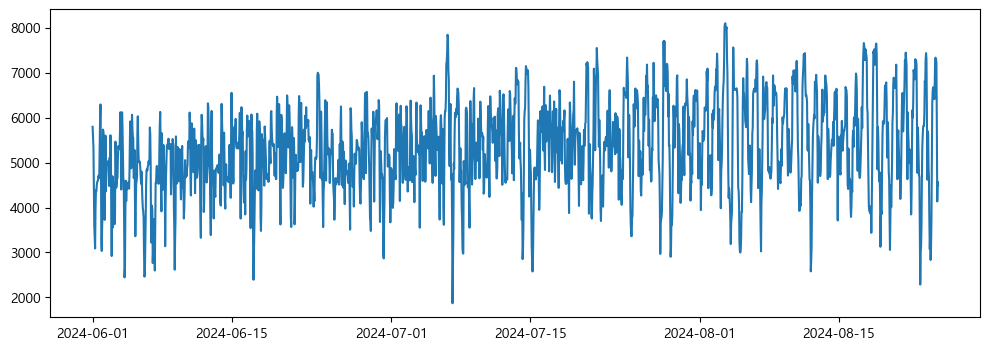

In [269]:
ts_plot(train_b1, "일시", "전력소비량")

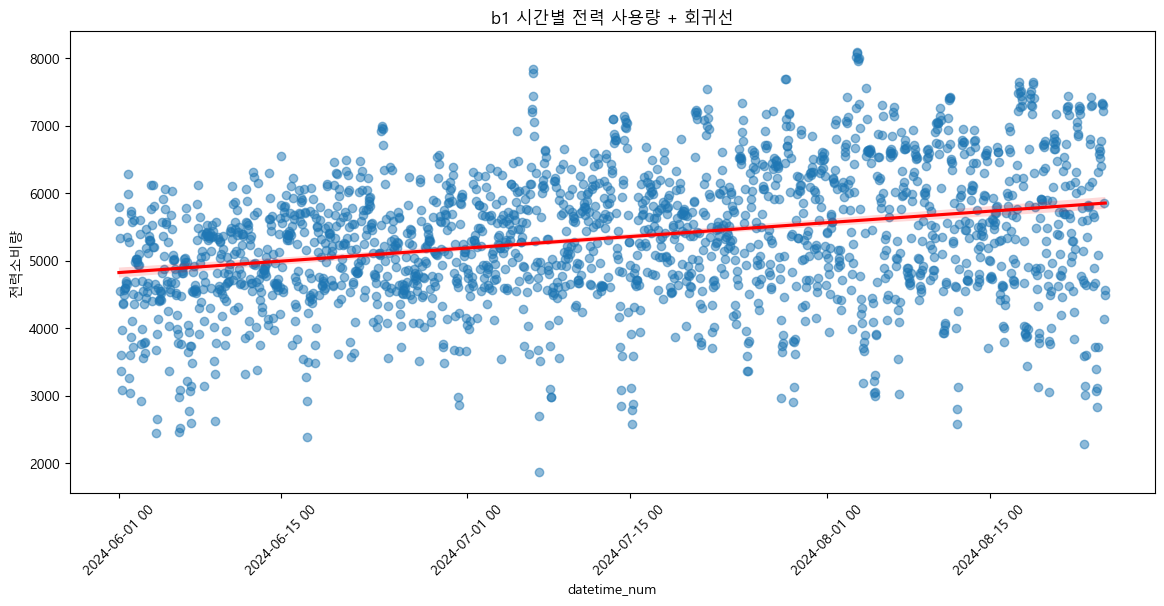

In [270]:
import matplotlib.dates as mdates
import seaborn as sns


train_b1['datetime_num'] = mdates.date2num(train_b1['datetime'])

plt.figure(figsize=(14, 6))
sns.regplot(
    data=train_b1,
    x='datetime_num',
    y='전력소비량',
    scatter_kws={'alpha':0.5},
    line_kws={'color': 'red'}
)

ax = plt.gca()
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H'))
plt.xticks(rotation=45)
plt.title('b1 시간별 전력 사용량 + 회귀선')
plt.show()

In [271]:
train_b1_d1 = train[ train["건물번호"] == 1 ][train["날짜"] == "2024-06-01"].copy()
train_b1_d1

C:\Users\leehy\AppData\Local\Temp\ipykernel_24752\29555953.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  train_b1_d1 = train[ train["건물번호"] == 1 ][train["날짜"] == "2024-06-01"].copy()


,numdatetime,건물번호,일시,기온,강수량,풍속,습도,일조,일사,전력소비량,datetime,날짜,시간
0,1_20240601 00,1,20240601 00,18.3,0.0,2.6,82.0,0.0,0.00,5794.80,2024-06-01 00:00:00,2024-06-01,0
1,1_20240601 01,1,20240601 01,18.3,0.0,2.7,82.0,0.0,0.00,5591.85,2024-06-01 01:00:00,2024-06-01,1
2,1_20240601 02,1,20240601 02,18.1,0.0,2.6,80.0,0.0,0.00,5338.17,2024-06-01 02:00:00,2024-06-01,2
3,1_20240601 03,1,20240601 03,18.0,0.0,2.6,81.0,0.0,0.00,4554.42,2024-06-01 03:00:00,2024-06-01,3
4,1_20240601 04,1,20240601 04,17.8,0.0,1.3,81.0,0.0,0.00,3602.25,2024-06-01 04:00:00,2024-06-01,4
5,1_20240601 05,1,20240601 05,17.7,0.0,2.2,83.0,0.0,0.00,3367.59,2024-06-01 05:00:00,2024-06-01,5
6,1_20240601 06,1,20240601 06,17.6,0.0,1.7,85.0,0.0,0.02,3089.40,2024-06-01 06:00:00,2024-06-01,6
7,1_20240601 07,1,20240601 07,17.7,0.0,1.2,81.0,0.0,0.22,3977.67,2024-06-01 07:00:00,2024-06-01,7
8,1_20240601 08,1,20240601 08,18.2,0.0,1.8,78.0,0.0,0.56,4380.45,2024-06-01 08:00:00,2024-06-01,8
9,1_20240601 09,1,20240601 09,19.4,0.0,2.4,70.0,0.4,1.27,4359.78,2024-06-01 09:00:00,2024-06-01,9


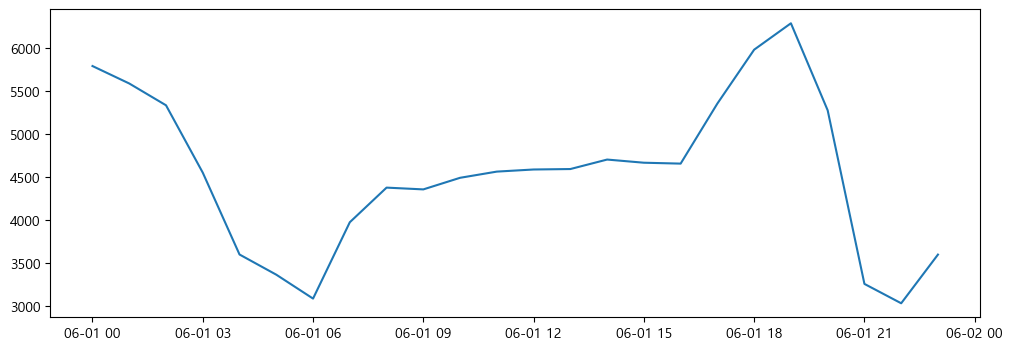

In [272]:
ts_plot(train_b1_d1, "datetime", "전력소비량")

# 빌딩1, 6월 1일하루 시간별 전력사용량

C:\Users\leehy\AppData\Local\Temp\ipykernel_24752\3463891546.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  train_b2_d1 = train[ train["건물번호"] == 2 ][train["날짜"] == "2024-06-01"].copy()


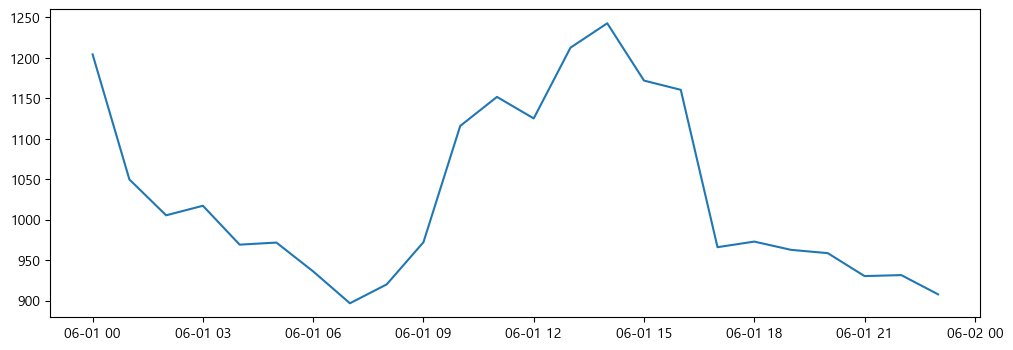

In [273]:
train_b2_d1 = train[ train["건물번호"] == 2 ][train["날짜"] == "2024-06-01"].copy()
ts_plot(train_b2_d1, "datetime", "전력소비량")

# 빌딩2의 6월 1일 시간별 소비량

C:\Users\leehy\AppData\Local\Temp\ipykernel_24752\2746802350.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  train_b1_d2 = train[ train["건물번호"] == 1 ][train["날짜"] == "2024-06-02"].copy()


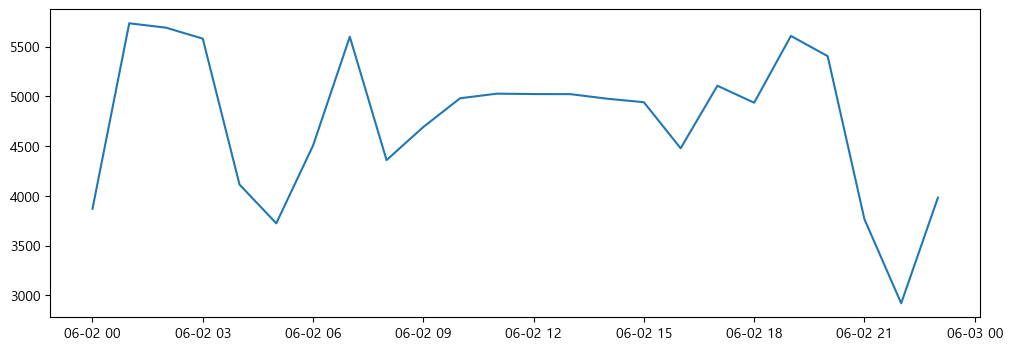

In [274]:
train_b1_d2 = train[ train["건물번호"] == 1 ][train["날짜"] == "2024-06-02"].copy()
ts_plot(train_b1_d2, "datetime", "전력소비량")


#빌딩1의 6월 2일 시간별

In [275]:

from matplotlib import rc



def plot_daily_comparison(df, building_id, dates, value_col='전력소비량'):

    df_plot = df[df['건물번호'] == building_id].copy()
    
    # 날짜/시간 컬럼 생성
    df_plot['날짜'] = df_plot['datetime'].dt.date
    df_plot['시간'] = df_plot['datetime'].dt.hour
    
    # 선택한 날짜만 필터링
    df_plot = df_plot[df_plot['날짜'].isin(pd.to_datetime(dates).date)]
    
    plt.figure(figsize=(12,6))
    sns.lineplot(
        data=df_plot, 
        x='시간', 
        y=value_col, 
        hue='날짜', 
        marker='o'
    )
    plt.title(f'b{building_id} 시간별 전력소비량 비교')
    plt.xlabel('시간')
    plt.ylabel(value_col)
    plt.xticks(range(0,24))
    plt.grid(True)
    plt.show()

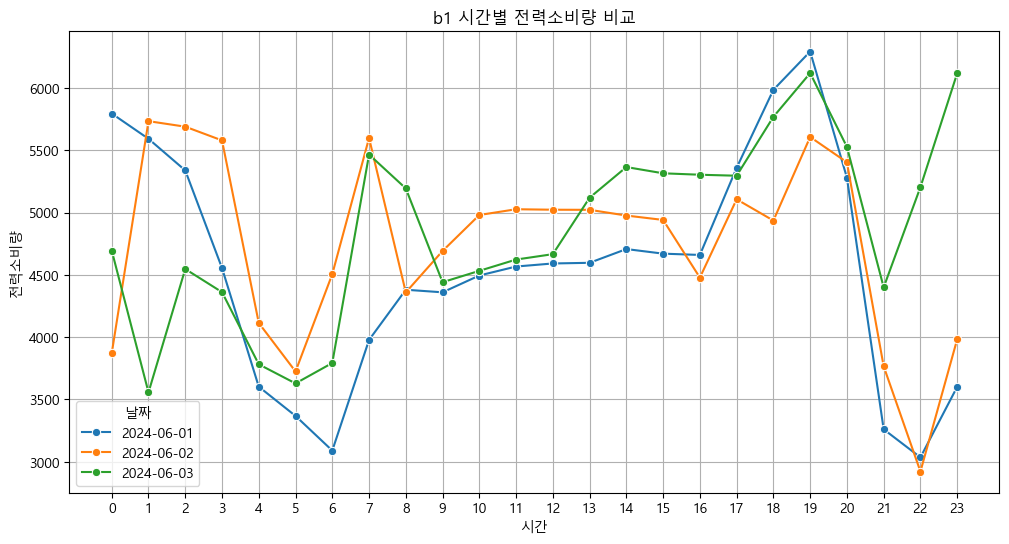

In [276]:
plot_daily_comparison(train, building_id=1, dates=['2024-06-01','2024-06-02', '2024-06-03'])


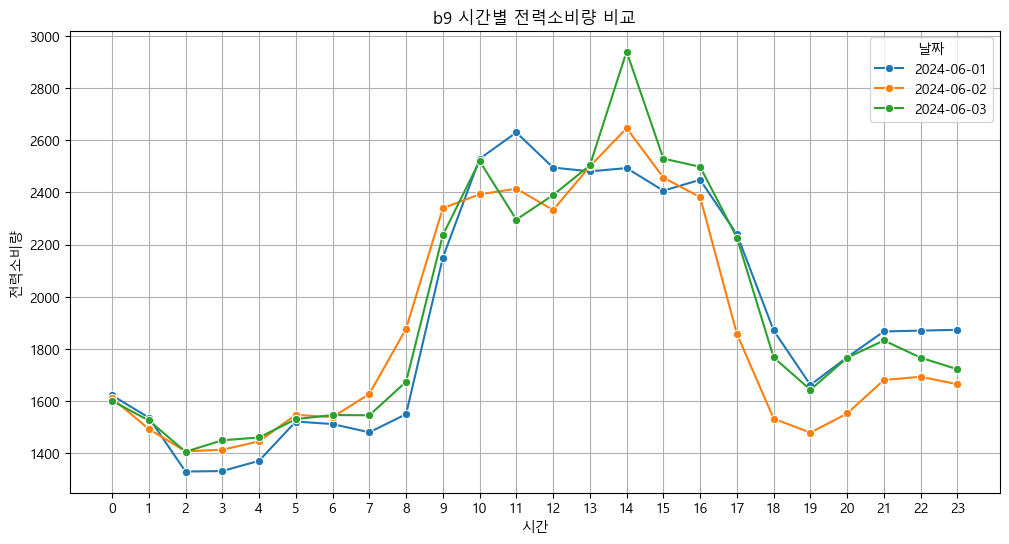

In [277]:
plot_daily_comparison(train, building_id=9, dates=['2024-06-01','2024-06-02', '2024-06-03'])


# 넣어보고싶은 빌딩/날짜 해봐도댑니당 날짜 갯수 더넣어봐도돼!

In [278]:

def plot_building_comparison(df, buildings, value_col='전력소비량'):

    df_plot = df[df['건물번호'].isin(buildings)].copy()
    
    # 시간(HH) 컬럼 생성
    df_plot['시간'] = df_plot['datetime'].dt.hour
    
    plt.figure(figsize=(12,6))
    sns.lineplot(
        data=df_plot,
        x='시간',
        y=value_col,
        hue='건물번호',
        marker='o'
    )
    plt.title('건물별 시간대(6월 1일기준) 전력 사용량 비교')
    plt.xlabel('시간')
    plt.ylabel(value_col)
    plt.xticks(range(0,24))
    plt.grid(True)
    plt.show()


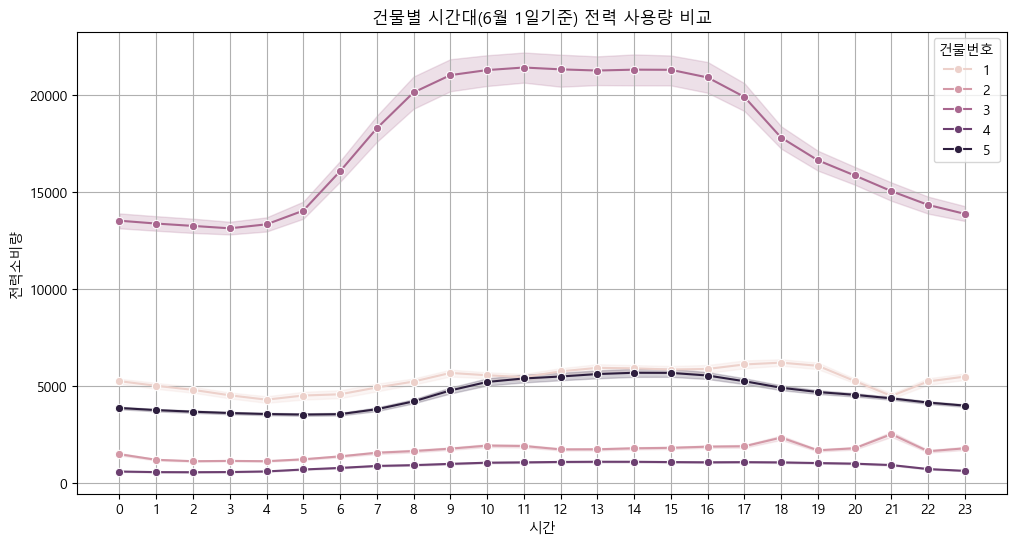

In [279]:
# 건물 1~5 비교
plot_building_comparison(train, buildings=[1,2,3,4,5])


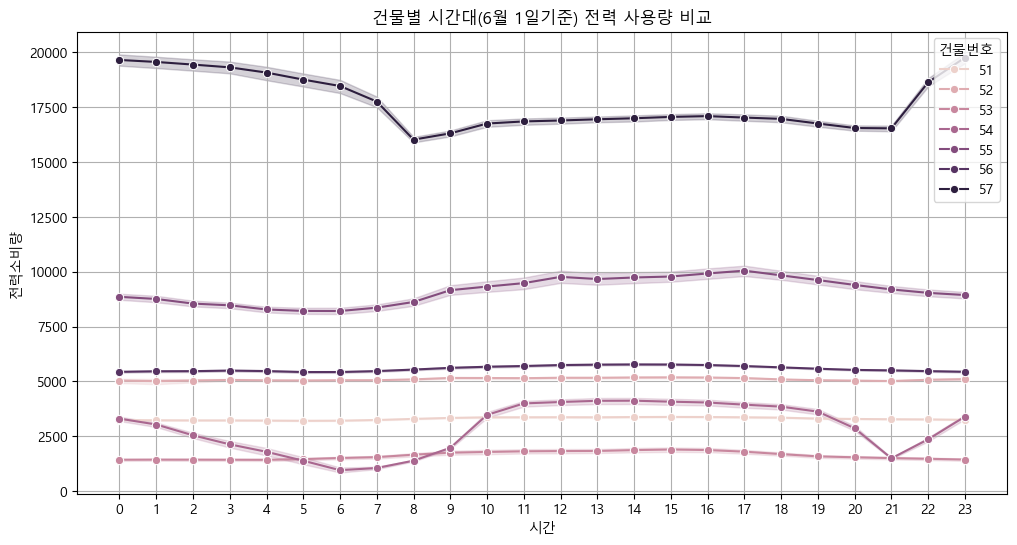

In [280]:
# 건물 51~57 비교
plot_building_comparison(train, buildings=[51,52,53,54,55,56,57])

In [281]:
def plot_building_datetime_comparison(df, buildings, start_date=None, end_date=None, value_col='전력소비량'):

    df_plot = df[df['건물번호'].isin(buildings)].copy()
    
    # datetime 기준 필터링
    if start_date:
        df_plot = df_plot[df_plot['datetime'] >= pd.to_datetime(start_date)]
    if end_date:
        df_plot = df_plot[df_plot['datetime'] <= pd.to_datetime(end_date)]
    
    plt.figure(figsize=(14,6))
    sns.lineplot(
        data=df_plot,
        x='datetime',
        y=value_col,
        hue='건물번호',
        #marker='o'
    )
    plt.title(f'{start_date} ~ {end_date} 건물별 전력 사용량 비교')
    plt.xlabel('Datetime')
    plt.ylabel(value_col)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

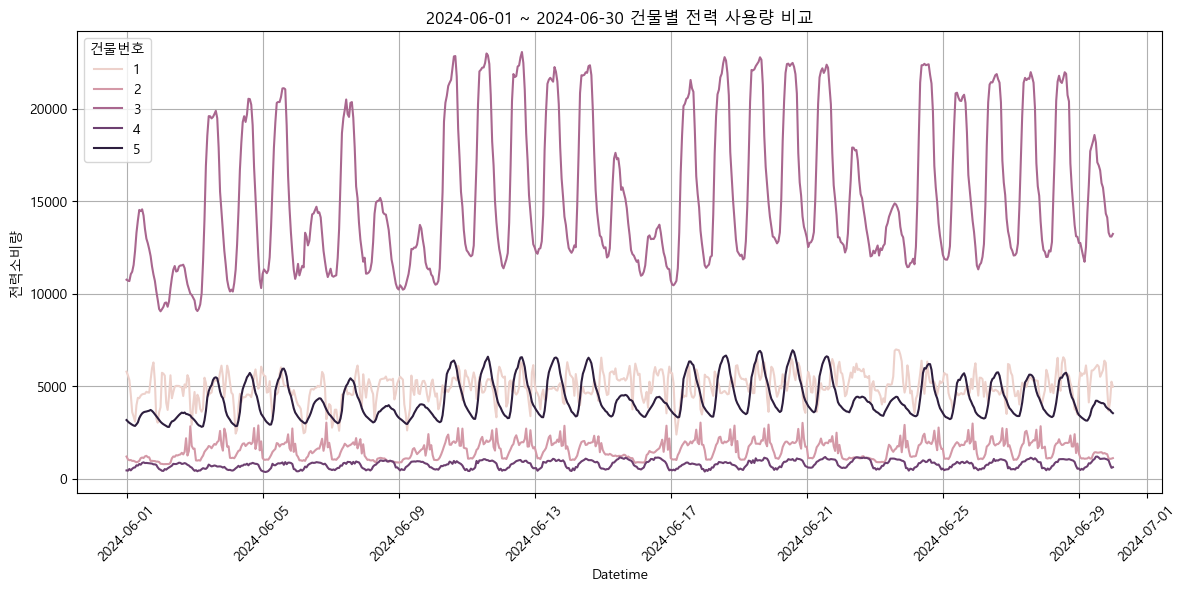

In [282]:
#원하는 날짜, 건물번호 바꿔가면서 돌려봐도되어욥
plot_building_datetime_comparison(
    train,
    buildings=range(1,6),
    start_date='2024-06-01',
    end_date='2024-06-30'
)

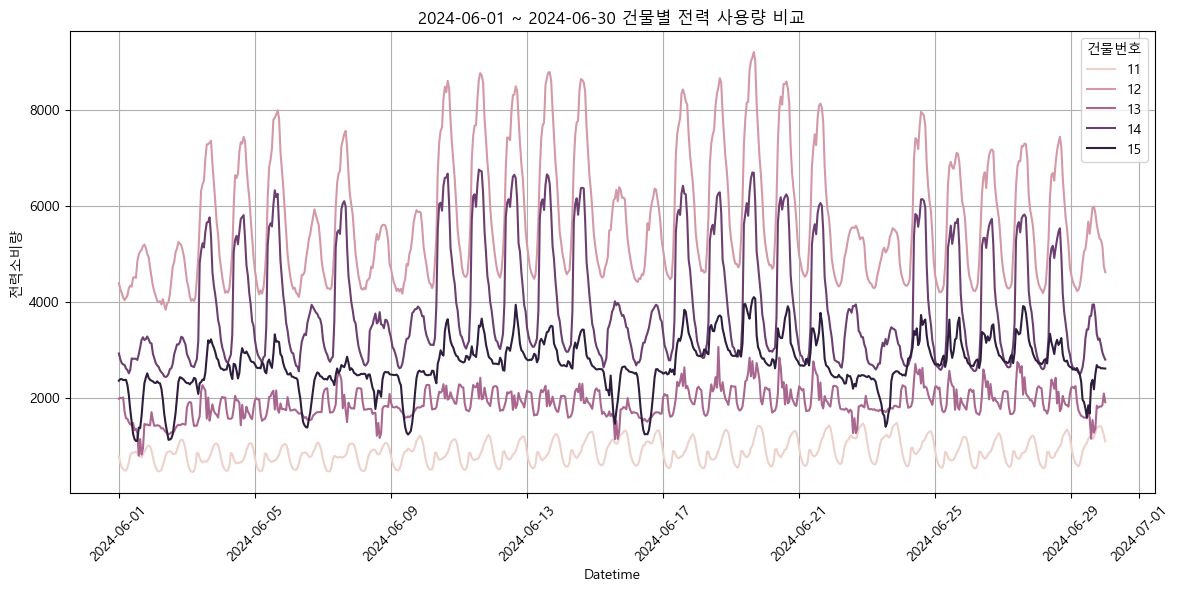

In [283]:
plot_building_datetime_comparison(
    train,
    buildings=range(11,16),   # 건물 11번~ 15번까지
    start_date='2024-06-01',   #6월 1일부터
    end_date='2024-06-30'       #6월 30일까지
)

## 전처리

In [284]:
# building 데이터 조인

train= train.merge(
    building,
    on='건물번호',
    how='left'  #건물번호 기준으로 붙히기
)

train.head()

,numdatetime,건물번호,일시,기온,강수량,풍속,습도,일조,일사,전력소비량,datetime,날짜,시간,건물유형,연면적,냉방면적,태양광용량,ESS저장용량,PCS용량
0,1_20240601 00,1,20240601 00,18.3,0.0,2.6,82.0,0.0,0.0,5794.80,2024-06-01 00:00:00,2024-06-01,0,호텔,82912.71,77586.0,NaN,NaN,NaN
1,1_20240601 01,1,20240601 01,18.3,0.0,2.7,82.0,0.0,0.0,5591.85,2024-06-01 01:00:00,2024-06-01,1,호텔,82912.71,77586.0,NaN,NaN,NaN
2,1_20240601 02,1,20240601 02,18.1,0.0,2.6,80.0,0.0,0.0,5338.17,2024-06-01 02:00:00,2024-06-01,2,호텔,82912.71,77586.0,NaN,NaN,NaN
3,1_20240601 03,1,20240601 03,18.0,0.0,2.6,81.0,0.0,0.0,4554.42,2024-06-01 03:00:00,2024-06-01,3,호텔,82912.71,77586.0,NaN,NaN,NaN
4,1_20240601 04,1,20240601 04,17.8,0.0,1.3,81.0,0.0,0.0,3602.25,2024-06-01 04:00:00,2024-06-01,4,호텔,82912.71,77586.0,NaN,NaN,NaN


In [285]:
test= test.merge(
    building,
    on='건물번호',
    how='left' 
)

test.head()

,numdatetime,건물번호,일시,기온,강수량,풍속,습도,datetime,날짜,시간,건물유형,연면적,냉방면적,태양광용량,ESS저장용량,PCS용량
0,1_20240825 00,1,20240825 00,26.5,0.0,0.7,80.0,2024-08-25 00:00:00,2024-08-25,0,호텔,82912.71,77586.0,NaN,NaN,NaN
1,1_20240825 01,1,20240825 01,26.1,0.0,0.0,80.0,2024-08-25 01:00:00,2024-08-25,1,호텔,82912.71,77586.0,NaN,NaN,NaN
2,1_20240825 02,1,20240825 02,25.9,0.0,0.3,83.0,2024-08-25 02:00:00,2024-08-25,2,호텔,82912.71,77586.0,NaN,NaN,NaN
3,1_20240825 03,1,20240825 03,25.7,0.0,1.1,83.0,2024-08-25 03:00:00,2024-08-25,3,호텔,82912.71,77586.0,NaN,NaN,NaN
4,1_20240825 04,1,20240825 04,25.5,0.0,1.0,86.0,2024-08-25 04:00:00,2024-08-25,4,호텔,82912.71,77586.0,NaN,NaN,NaN


각 시간별, 날짜별, 요일별, 주말, 달 별 분류

In [286]:
train['hour'] = train['datetime'].dt.hour
train['day'] = train['datetime'].dt.day
train['weekday'] = train['datetime'].dt.weekday        # 월=0, 일=6
train['is_weekend'] = train['weekday'].isin([5,6]).astype(int)
train['month'] = train['datetime'].dt.month

In [287]:
test['hour'] = test['datetime'].dt.hour
test['day'] = test['datetime'].dt.day
test['weekday'] = test['datetime'].dt.weekday        # 월=0, 일=6
test['is_weekend'] = test['weekday'].isin([5,6]).astype(int)
test['month'] = test['datetime'].dt.month

In [288]:
# 건물유형 원핫인 코딩
train = pd.get_dummies(train, columns=['건물유형'], drop_first=True)
test = pd.get_dummies(test, columns=['건물유형'], drop_first=True)

In [289]:
#로그스케일링

train['연면적_log'] = np.log1p(train['연면적'])
train['냉방면적_log'] = np.log1p(train['냉방면적'])
test['연면적_log'] = np.log1p(test['연면적'])
test['냉방면적_log'] = np.log1p(test['냉방면적'])

# 다른 칼럼들은 모델에 따라 필요유무 판단 필요

In [290]:
train.columns

Index(['numdatetime', '건물번호', '일시', '기온', '강수량', '풍속', '습도', '일조', '일사',
       '전력소비량', 'datetime', '날짜', '시간', '연면적', '냉방면적', '태양광용량', 'ESS저장용량',
       'PCS용량', 'hour', 'day', 'weekday', 'is_weekend', 'month', '건물유형_건물기타',
       '건물유형_공공', '건물유형_백화점', '건물유형_병원', '건물유형_상용', '건물유형_아파트', '건물유형_연구소',
       '건물유형_학교', '건물유형_호텔', '연면적_log', '냉방면적_log'],
      dtype='object')

In [291]:
test.columns

Index(['numdatetime', '건물번호', '일시', '기온', '강수량', '풍속', '습도', 'datetime', '날짜',
       '시간', '연면적', '냉방면적', '태양광용량', 'ESS저장용량', 'PCS용량', 'hour', 'day',
       'weekday', 'is_weekend', 'month', '건물유형_건물기타', '건물유형_공공', '건물유형_백화점',
       '건물유형_병원', '건물유형_상용', '건물유형_아파트', '건물유형_연구소', '건물유형_학교', '건물유형_호텔',
       '연면적_log', '냉방면적_log'],
      dtype='object')

In [292]:
#필요없는 칼럼 제거
drop_col1 = ["numdatetime", "일시", "날짜", "시간", "연면적", "냉방면적","일조","일사"]
drop_col2 = ["numdatetime", "일시" ,"날짜", "시간", "연면적", "냉방면적"]
train = train.drop(columns=drop_col1)
test = test.drop(columns=drop_col2)

# 나중에 상관성 보고 더 제거해도 될듯

In [293]:
train.head()

,건물번호,기온,강수량,풍속,습도,전력소비량,datetime,태양광용량,ESS저장용량,PCS용량,hour,day,weekday,is_weekend,month,건물유형_건물기타,건물유형_공공,건물유형_백화점,건물유형_병원,건물유형_상용,건물유형_아파트,건물유형_연구소,건물유형_학교,건물유형_호텔,연면적_log,냉방면적_log
0,1,18.3,0.0,2.6,82.0,5794.80,2024-06-01 00:00:00,NaN,NaN,NaN,0,1,5,1,6,False,False,False,False,False,False,False,False,True,11.325556,11.259155
1,1,18.3,0.0,2.7,82.0,5591.85,2024-06-01 01:00:00,NaN,NaN,NaN,1,1,5,1,6,False,False,False,False,False,False,False,False,True,11.325556,11.259155
2,1,18.1,0.0,2.6,80.0,5338.17,2024-06-01 02:00:00,NaN,NaN,NaN,2,1,5,1,6,False,False,False,False,False,False,False,False,True,11.325556,11.259155
3,1,18.0,0.0,2.6,81.0,4554.42,2024-06-01 03:00:00,NaN,NaN,NaN,3,1,5,1,6,False,False,False,False,False,False,False,False,True,11.325556,11.259155
4,1,17.8,0.0,1.3,81.0,3602.25,2024-06-01 04:00:00,NaN,NaN,NaN,4,1,5,1,6,False,False,False,False,False,False,False,False,True,11.325556,11.259155


In [294]:
test.head()

,건물번호,기온,강수량,풍속,습도,datetime,태양광용량,ESS저장용량,PCS용량,hour,day,weekday,is_weekend,month,건물유형_건물기타,건물유형_공공,건물유형_백화점,건물유형_병원,건물유형_상용,건물유형_아파트,건물유형_연구소,건물유형_학교,건물유형_호텔,연면적_log,냉방면적_log
0,1,26.5,0.0,0.7,80.0,2024-08-25 00:00:00,NaN,NaN,NaN,0,25,6,1,8,False,False,False,False,False,False,False,False,True,11.325556,11.259155
1,1,26.1,0.0,0.0,80.0,2024-08-25 01:00:00,NaN,NaN,NaN,1,25,6,1,8,False,False,False,False,False,False,False,False,True,11.325556,11.259155
2,1,25.9,0.0,0.3,83.0,2024-08-25 02:00:00,NaN,NaN,NaN,2,25,6,1,8,False,False,False,False,False,False,False,False,True,11.325556,11.259155
3,1,25.7,0.0,1.1,83.0,2024-08-25 03:00:00,NaN,NaN,NaN,3,25,6,1,8,False,False,False,False,False,False,False,False,True,11.325556,11.259155
4,1,25.5,0.0,1.0,86.0,2024-08-25 04:00:00,NaN,NaN,NaN,4,25,6,1,8,False,False,False,False,False,False,False,False,True,11.325556,11.259155


태양광, ESS, PCS 전처리

결측값-> 0  
유무 칼럼 생성

In [295]:
train_dl = train.copy()

for col in ["태양광용량", "ESS저장용량", "PCS용량"]:
    train_dl[f"{col}_exists"] = train_dl[col].notna().astype(int)
    train_dl[col] = train_dl[col].fillna(0)
    


In [296]:
test_dl = test.copy()
for col in ["태양광용량", "ESS저장용량", "PCS용량"]:
    test_dl[f"{col}_exists"] = test_dl[col].notna().astype(int)
    test_dl[col] = test[col].fillna(0)
    

스케일링

In [297]:
from sklearn.preprocessing import MinMaxScaler

scaler_cols = ["기온", "강수량", "풍속", "습도",
               "연면적_log", "냉방면적_log",
               "태양광용량", "ESS저장용량", "PCS용량"]

scaler = MinMaxScaler()
train_dl[scaler_cols] = scaler.fit_transform(train_dl[scaler_cols])
test_dl[scaler_cols]=scaler.transform(test_dl[scaler_cols])


In [298]:
#타겟변수-> 건물 번호 별로 스케일링

target_scalers = {}
for b in train_dl["건물번호"].unique():
    scaler = MinMaxScaler()
    b_idx = train_dl["건물번호"] == b
    train_dl.loc[b_idx, "전력소비량"] = scaler.fit_transform(train_dl.loc[b_idx, ["전력소비량"]])
    target_scalers[b] = scaler


In [299]:
#역스케일링위한 값

scale_info = []

for b_id, df_b in train_row.groupby("건물번호"):
    y = df_b["전력소비량(kWh)"]
    scale_info.append({
        "건물번호": b_id,
        "min": y.min(),
        "max": y.max()
    })

scale_info = pd.DataFrame(scale_info)


In [300]:
scale_info.to_csv("b_scale_info.csv", index=False)

rag, roll 추가

In [301]:
'''
def generate_building_lag_roll(df, target_col="전력소비량"):
    df = df.copy()
    
    #재정렬
    df = df.sort_values(["건물번호", "datetime"]).reset_index(drop=True)
    
    # 건물별로groupby
    df["lag_1"] = df.groupby("건물번호")[target_col].shift(1)
    df["lag_24"] = df.groupby("건물번호")[target_col].shift(24)

    df["roll_6"] = df.groupby("건물번호")[target_col].transform(lambda x: x.shift(1).rolling(6).mean())
    df["roll_24"] = df.groupby("건물번호")[target_col].transform(lambda x: x.shift(1).rolling(24).mean())

    return df

train_dl = generate_building_lag_roll(train_dl)'''

'\ndef generate_building_lag_roll(df, target_col="전력소비량"):\n    df = df.copy()\n    \n    #재정렬\n    df = df.sort_values(["건물번호", "datetime"]).reset_index(drop=True)\n    \n    # 건물별로groupby\n    df["lag_1"] = df.groupby("건물번호")[target_col].shift(1)\n    df["lag_24"] = df.groupby("건물번호")[target_col].shift(24)\n\n    df["roll_6"] = df.groupby("건물번호")[target_col].transform(lambda x: x.shift(1).rolling(6).mean())\n    df["roll_24"] = df.groupby("건물번호")[target_col].transform(lambda x: x.shift(1).rolling(24).mean())\n\n    return df\n\ntrain_dl = generate_building_lag_roll(train_dl)'

In [302]:
'''
#test에서는 없으니까 일단 널
test_dl["lag_1"] = np.nan
test_dl["lag_24"] = np.nan

test_dl["roll_6"] = np.nan
test_dl["roll_24"]= np.nan'''

'\n#test에서는 없으니까 일단 널\ntest_dl["lag_1"] = np.nan\ntest_dl["lag_24"] = np.nan\n\ntest_dl["roll_6"] = np.nan\ntest_dl["roll_24"]= np.nan'

In [303]:
train_dl

,건물번호,기온,강수량,풍속,습도,전력소비량,datetime,태양광용량,ESS저장용량,PCS용량,hour,day,weekday,is_weekend,month,건물유형_건물기타,건물유형_공공,건물유형_백화점,건물유형_병원,건물유형_상용,건물유형_아파트,건물유형_연구소,건물유형_학교,건물유형_호텔,연면적_log,냉방면적_log,태양광용량_exists,ESS저장용량_exists,PCS용량_exists
0,1,0.326733,0.0,0.171053,0.82,0.630237,2024-06-01 00:00:00,0.0,0.0,0.0,0,1,5,1,6,False,False,False,False,False,False,False,False,True,0.365115,0.627371,0,0,0
1,1,0.326733,0.0,0.177632,0.82,0.597644,2024-06-01 01:00:00,0.0,0.0,0.0,1,1,5,1,6,False,False,False,False,False,False,False,False,True,0.365115,0.627371,0,0,0
2,1,0.320132,0.0,0.171053,0.80,0.556904,2024-06-01 02:00:00,0.0,0.0,0.0,2,1,5,1,6,False,False,False,False,False,False,False,False,True,0.365115,0.627371,0,0,0
3,1,0.316832,0.0,0.171053,0.81,0.431037,2024-06-01 03:00:00,0.0,0.0,0.0,3,1,5,1,6,False,False,False,False,False,False,False,False,True,0.365115,0.627371,0,0,0
4,1,0.310231,0.0,0.085526,0.81,0.278122,2024-06-01 04:00:00,0.0,0.0,0.0,4,1,5,1,6,False,False,False,False,False,False,False,False,True,0.365115,0.627371,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203995,100,0.683168,0.0,0.289474,0.76,0.937575,2024-08-24 19:00:00,0.0,0.0,0.0,19,24,5,1,8,False,False,False,False,False,False,False,False,True,0.481006,0.705731,0,0,0
203996,100,0.666667,0.0,0.243421,0.74,0.907533,2024-08-24 20:00:00,0.0,0.0,0.0,20,24,5,1,8,False,False,False,False,False,False,False,False,True,0.481006,0.705731,0,0,0
203997,100,0.656766,0.0,0.190789,0.74,0.834451,2024-08-24 21:00:00,0.0,0.0,0.0,21,24,5,1,8,False,False,False,False,False,False,False,False,True,0.481006,0.705731,0,0,0
203998,100,0.646865,0.0,0.111842,0.76,0.697841,2024-08-24 22:00:00,0.0,0.0,0.0,22,24,5,1,8,False,False,False,False,False,False,False,False,True,0.481006,0.705731,0,0,0


In [304]:
test_dl

,건물번호,기온,강수량,풍속,습도,datetime,태양광용량,ESS저장용량,PCS용량,hour,day,weekday,is_weekend,month,건물유형_건물기타,건물유형_공공,건물유형_백화점,건물유형_병원,건물유형_상용,건물유형_아파트,건물유형_연구소,건물유형_학교,건물유형_호텔,연면적_log,냉방면적_log,태양광용량_exists,ESS저장용량_exists,PCS용량_exists
0,1,0.597360,0.0,0.046053,0.80,2024-08-25 00:00:00,0.0,0.0,0.0,0,25,6,1,8,False,False,False,False,False,False,False,False,True,0.365115,0.627371,0,0,0
1,1,0.584158,0.0,0.000000,0.80,2024-08-25 01:00:00,0.0,0.0,0.0,1,25,6,1,8,False,False,False,False,False,False,False,False,True,0.365115,0.627371,0,0,0
2,1,0.577558,0.0,0.019737,0.83,2024-08-25 02:00:00,0.0,0.0,0.0,2,25,6,1,8,False,False,False,False,False,False,False,False,True,0.365115,0.627371,0,0,0
3,1,0.570957,0.0,0.072368,0.83,2024-08-25 03:00:00,0.0,0.0,0.0,3,25,6,1,8,False,False,False,False,False,False,False,False,True,0.365115,0.627371,0,0,0
4,1,0.564356,0.0,0.065789,0.86,2024-08-25 04:00:00,0.0,0.0,0.0,4,25,6,1,8,False,False,False,False,False,False,False,False,True,0.365115,0.627371,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16795,100,0.617162,0.0,0.177632,0.68,2024-08-31 19:00:00,0.0,0.0,0.0,19,31,5,1,8,False,False,False,False,False,False,False,False,True,0.481006,0.705731,0,0,0
16796,100,0.597360,0.0,0.190789,0.73,2024-08-31 20:00:00,0.0,0.0,0.0,20,31,5,1,8,False,False,False,False,False,False,False,False,True,0.481006,0.705731,0,0,0
16797,100,0.590759,0.0,0.230263,0.73,2024-08-31 21:00:00,0.0,0.0,0.0,21,31,5,1,8,False,False,False,False,False,False,False,False,True,0.481006,0.705731,0,0,0
16798,100,0.580858,0.0,0.223684,0.68,2024-08-31 22:00:00,0.0,0.0,0.0,22,31,5,1,8,False,False,False,False,False,False,False,False,True,0.481006,0.705731,0,0,0


In [ ]:
#train_dl[['lag_1', 'lag_24', 'roll_6', 'roll_24']] = train_dl[['lag_1', 'lag_24', 'roll_6', 'roll_24']].fillna(method='bfill')

C:\Users\leehy\AppData\Local\Temp\ipykernel_24752\3303939266.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  train_dl[['lag_1', 'lag_24', 'roll_6', 'roll_24']] = train_dl[['lag_1', 'lag_24', 'roll_6', 'roll_24']].fillna(method='bfill')


In [185]:
train_dl

,건물번호,기온,강수량,풍속,습도,전력소비량,datetime,태양광용량,ESS저장용량,PCS용량,hour,day,weekday,is_weekend,month,건물유형_건물기타,건물유형_공공,건물유형_백화점,건물유형_병원,건물유형_상용,건물유형_아파트,건물유형_연구소,건물유형_학교,건물유형_호텔,연면적_log,냉방면적_log,태양광용량_exists,ESS저장용량_exists,PCS용량_exists,lag_1,lag_24,roll_6,roll_24
0,1,0.326733,0.0,0.171053,0.82,0.630237,2024-06-01 00:00:00,0.0,0.0,0.0,0,1,5,1,6,False,False,False,False,False,False,False,False,True,0.365115,0.627371,0,0,0,0.630237,0.630237,0.455730,0.430025
1,1,0.326733,0.0,0.177632,0.82,0.597644,2024-06-01 01:00:00,0.0,0.0,0.0,1,1,5,1,6,False,False,False,False,False,False,False,False,True,0.365115,0.627371,0,0,0,0.630237,0.630237,0.455730,0.430025
2,1,0.320132,0.0,0.171053,0.80,0.556904,2024-06-01 02:00:00,0.0,0.0,0.0,2,1,5,1,6,False,False,False,False,False,False,False,False,True,0.365115,0.627371,0,0,0,0.597644,0.630237,0.455730,0.430025
3,1,0.316832,0.0,0.171053,0.81,0.431037,2024-06-01 03:00:00,0.0,0.0,0.0,3,1,5,1,6,False,False,False,False,False,False,False,False,True,0.365115,0.627371,0,0,0,0.556904,0.630237,0.455730,0.430025
4,1,0.310231,0.0,0.085526,0.81,0.278122,2024-06-01 04:00:00,0.0,0.0,0.0,4,1,5,1,6,False,False,False,False,False,False,False,False,True,0.365115,0.627371,0,0,0,0.431037,0.630237,0.455730,0.430025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203995,100,0.683168,0.0,0.289474,0.76,0.937575,2024-08-24 19:00:00,0.0,0.0,0.0,19,24,5,1,8,False,False,False,False,False,False,False,False,True,0.481006,0.705731,0,0,0,0.950482,0.528342,0.537613,0.487249
203996,100,0.666667,0.0,0.243421,0.74,0.907533,2024-08-24 20:00:00,0.0,0.0,0.0,20,24,5,1,8,False,False,False,False,False,False,False,False,True,0.481006,0.705731,0,0,0,0.937575,0.473679,0.640836,0.504301
203997,100,0.656766,0.0,0.190789,0.74,0.834451,2024-08-24 21:00:00,0.0,0.0,0.0,21,24,5,1,8,False,False,False,False,False,False,False,False,True,0.481006,0.705731,0,0,0,0.907533,0.128020,0.717769,0.522378
203998,100,0.646865,0.0,0.111842,0.76,0.697841,2024-08-24 22:00:00,0.0,0.0,0.0,22,24,5,1,8,False,False,False,False,False,False,False,False,True,0.481006,0.705731,0,0,0,0.834451,0.478365,0.813168,0.551813


In [305]:
train_dl.columns

Index(['건물번호', '기온', '강수량', '풍속', '습도', '전력소비량', 'datetime', '태양광용량',
       'ESS저장용량', 'PCS용량', 'hour', 'day', 'weekday', 'is_weekend', 'month',
       '건물유형_건물기타', '건물유형_공공', '건물유형_백화점', '건물유형_병원', '건물유형_상용', '건물유형_아파트',
       '건물유형_연구소', '건물유형_학교', '건물유형_호텔', '연면적_log', '냉방면적_log', '태양광용량_exists',
       'ESS저장용량_exists', 'PCS용량_exists'],
      dtype='object')

In [306]:
test_dl.columns

Index(['건물번호', '기온', '강수량', '풍속', '습도', 'datetime', '태양광용량', 'ESS저장용량',
       'PCS용량', 'hour', 'day', 'weekday', 'is_weekend', 'month', '건물유형_건물기타',
       '건물유형_공공', '건물유형_백화점', '건물유형_병원', '건물유형_상용', '건물유형_아파트', '건물유형_연구소',
       '건물유형_학교', '건물유형_호텔', '연면적_log', '냉방면적_log', '태양광용량_exists',
       'ESS저장용량_exists', 'PCS용량_exists'],
      dtype='object')

## 머신러닝 시작

### 데이터 분할

In [307]:
def time_series_split(train, target_col="전력소비량", val_ratio=0.2):

    #lag/rolling 결측 제거
    #lag_cols = ["lag_1", "lag_24", "roll_6", "roll_24"]
    #train = train.dropna(subset=lag_cols).reset_index(drop=True)

    #시계열 split
    split_idx = int(len(train) * (1 - val_ratio))

    X_train = train.iloc[:split_idx].drop(columns=[target_col])
    y_train = train.iloc[:split_idx][target_col]

    X_val = train.iloc[split_idx:].drop(columns=[target_col])
    y_val = train.iloc[split_idx:][target_col]

    #datetime 드랍
    if "datetime" in X_train.columns:
        X_train = X_train.drop(columns=["datetime"])
        X_val   = X_val.drop(columns=["datetime"])


    for col in X_train.columns:
        if X_train[col].dtype == "object":
            # try convert to numeric, otherwise leave as is (shouldn't happen if we handled presence)
            X_train[col] = pd.to_numeric(X_train[col], errors="coerce").fillna(0)

    for col in X_val.columns:
        if X_val[col].dtype == "object":
            # try convert to numeric, otherwise leave as is (shouldn't happen if we handled presence)
            X_val[col] = pd.to_numeric(X_val[col], errors="coerce").fillna(0)
    

    print("Train shape:", X_train.shape, "Validation shape:", X_val.shape)
    return X_train, X_val, y_train, y_val



In [308]:
X_train, X_val, y_train, y_val = time_series_split(train_dl)


Train shape: (163200, 27) Validation shape: (40800, 27)


모델 생성/ 비교

- lightGBM
- XG부스팅
- CAT부스팅
- 렌덤포레스트
- 그리디언트 부스팅
- ADA부스팅
- 배깅
- 의사결정 나무

In [309]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
import lightgbm as lgb
import xgboost as xgb
from catboost import CatBoostRegressor
import numpy as np

def smape(A, F):
    return 100/len(A) * np.sum(2 * np.abs(F-A) / (np.abs(A) + np.abs(F)))

def compare_models_all(X_train, X_val, y_train, y_val):

    models = {
        "LightGBM": lgb.LGBMRegressor(n_estimators=500, learning_rate=0.05),
        "XGBoost": xgb.XGBRegressor(n_estimators=500, learning_rate=0.05),
        "CatBoost": CatBoostRegressor(verbose=False),
        "RandomForest": RandomForestRegressor(n_estimators=300),
        "GradientBoosting": GradientBoostingRegressor(),
        "AdaBoost": AdaBoostRegressor(),
        "Bagging": BaggingRegressor(),
        "DecisionTree": DecisionTreeRegressor()
    }

    results = []

    for name, model in models.items():
        print(f"▶ Training {name}...")
        model.fit(X_train, y_train)
        preds = model.predict(X_val)

        mae = mean_absolute_error(y_val, preds)
        rmse = np.sqrt(mean_squared_error(y_val, preds))
        s = smape(y_val.values, preds)

        results.append([name, mae, rmse, s])

    result_df = pd.DataFrame(results, columns=["Model", "MAE", "RMSE", "SMAPE"])
    print("\n=== Model Comparison ===")
    print(result_df)

    best_model_name = result_df.sort_values("SMAPE").iloc[0]["Model"]
    print(f"\n🔥 Best Model: {best_model_name}")

    return models[best_model_name], result_df


In [310]:
best_model, model_scores = compare_models_all(X_train, X_val, y_train, y_val)


▶ Training LightGBM...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006564 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1036
[LightGBM] [Info] Number of data points in the train set: 163200, number of used features: 27
[LightGBM] [Info] Start training from score 0.483065
▶ Training XGBoost...
▶ Training CatBoost...
▶ Training RandomForest...
▶ Training GradientBoosting...
▶ Training AdaBoost...
▶ Training Bagging...
▶ Training DecisionTree...

=== Model Comparison ===
              Model       MAE      RMSE      SMAPE
0          LightGBM  0.151213  0.196418  40.738339
1           XGBoost  0.154368  0.198498  41.421678
2          CatBoost  0.156536  0.200297  41.658651
3      RandomForest  0.165464  0.213652  44.734278
4  GradientBoosting  0.157422  0.202027  41.969668
5          AdaBoost  0.189158  0.222077  47.665264
6           

test에 lag_1, lag_24, roll_6, roll_24 자동 생성 + 반복 예측


In [311]:
def fix_features_for_model(df, train_features):
    df = df.copy()

    for col in train_features:
        if col not in df.columns:
            df[col] = 0

    extra_cols = [c for c in df.columns if c not in train_features]
    if extra_cols:
        df = df.drop(columns=extra_cols)

    df = df[train_features]

    for c in df.columns:
        if df[c].dtype == object:
            df[c] = pd.to_numeric(df[c], errors="coerce").fillna(0)

    return df


In [312]:
from tqdm import tqdm

def create_test_features(test, train_y, model, train_features):

    test = test.copy()

    #결과 리스트
    all_results = []

    building_ids = sorted(test["건물번호"].unique())

    for b_id in building_ids:
        print(f"\n[ Predicting Building {b_id} ]")


        test_b = test[test["건물번호"] == b_id].reset_index(drop=True) # 건물번호별

        train_b = train[train["건물번호"] == b_id]
        train_y_b = train_b["전력소비량"]

        last_values = list(train_y_b.values[-24:])
        if len(last_values) < 24:
            last_values = (last_values * (24 // len(last_values) + 1))[:24]

        preds = []

        for i in range(len(test_b)):
            '''
            #lag roll
            test_b.loc[i, "lag_1"] = last_values[-1]
            test_b.loc[i, "lag_24"] = last_values[-24]
            test_b.loc[i, "roll_6"] = np.mean(last_values[-6:])
            test_b.loc[i, "roll_24"] = np.mean(last_values)'''

            row = test_b.iloc[i:i+1].copy()
            row = fix_features_for_model(row, train_features)

            #예측
            pred = model.predict(row)[0]
            preds.append(pred)

            #regressive
            last_values.append(pred)
            last_values = last_values[-24:]

        #저장
        test_b["prediction"] = preds
        all_results.append(test_b)

    final_test = pd.concat(all_results).sort_index()

    return final_test

In [313]:
train_features = X_train.columns.tolist()



In [315]:
test_pred = create_test_features(test_dl, train["전력소비량"], best_model, train_features)


[ Predicting Building 1 ]

[ Predicting Building 2 ]

[ Predicting Building 3 ]

[ Predicting Building 4 ]

[ Predicting Building 5 ]

[ Predicting Building 6 ]

[ Predicting Building 7 ]

[ Predicting Building 8 ]

[ Predicting Building 9 ]

[ Predicting Building 10 ]

[ Predicting Building 11 ]

[ Predicting Building 12 ]

[ Predicting Building 13 ]

[ Predicting Building 14 ]

[ Predicting Building 15 ]

[ Predicting Building 16 ]

[ Predicting Building 17 ]

[ Predicting Building 18 ]

[ Predicting Building 19 ]

[ Predicting Building 20 ]

[ Predicting Building 21 ]

[ Predicting Building 22 ]

[ Predicting Building 23 ]

[ Predicting Building 24 ]

[ Predicting Building 25 ]

[ Predicting Building 26 ]

[ Predicting Building 27 ]

[ Predicting Building 28 ]

[ Predicting Building 29 ]

[ Predicting Building 30 ]

[ Predicting Building 31 ]

[ Predicting Building 32 ]

[ Predicting Building 33 ]

[ Predicting Building 34 ]

[ Predicting Building 35 ]

[ Predicting Building 36 ]



In [316]:
test_pred["prediction"]

0      0.433934
0      0.098040
0      0.497534
0      0.116300
0      0.251945
         ...   
167    0.745390
167    0.557617
167    0.588364
167    0.097268
167    0.483279
Name: prediction, Length: 16800, dtype: float64

In [317]:
len(test_row), len(test_pred)

(16800, 16800)

In [318]:
submit = pd.DataFrame({
    "num_date_time": test_row["num_date_time"].values,
    "answer": test_pred["prediction"].values
})

submit

,num_date_time,answer
0,1_20240825 00,0.433934
1,1_20240825 01,0.098040
2,1_20240825 02,0.497534
3,1_20240825 03,0.116300
4,1_20240825 04,0.251945
...,...,...
16795,100_20240831 19,0.745390
16796,100_20240831 20,0.557617
16797,100_20240831 21,0.588364
16798,100_20240831 22,0.097268


---


결과 그래프 출력

In [319]:
df = submit.copy()   

# 건물번호/날짜/시간 분리
df[["building", "date_hour"]] = df["num_date_time"].str.split("_", expand=True)
df[["date", "hour"]] = df["date_hour"].str.split(" ", expand=True)
df = df.drop(columns=["date_hour"])

df["building"] = df["building"].astype(int)
df["datetime"] = pd.to_datetime(df["date"] + " " + df["hour"] + ":00")

In [320]:
scale_dict = {int(r["건물번호"]): (r["min"], r["max"]) for _, r in scale_info.iterrows()}

def inverse_scale(value, b_id):
    y_min, y_max = scale_dict[b_id]
    return value * (y_max - y_min) + y_min


df["answer"] = df.apply(lambda row: inverse_scale(row["answer"], row["building"]), axis=1)

In [321]:
submit["answer"] = df["answer"]

In [322]:
submit

,num_date_time,answer
0,1_20240825 00,4572.459071
1,1_20240825 01,2480.912864
2,1_20240825 02,4968.487509
3,1_20240825 03,2594.618271
4,1_20240825 04,3439.251185
...,...,...
16795,100_20240831 19,2773.936902
16796,100_20240831 20,2283.399314
16797,100_20240831 21,2363.721707
16798,100_20240831 22,1080.784069


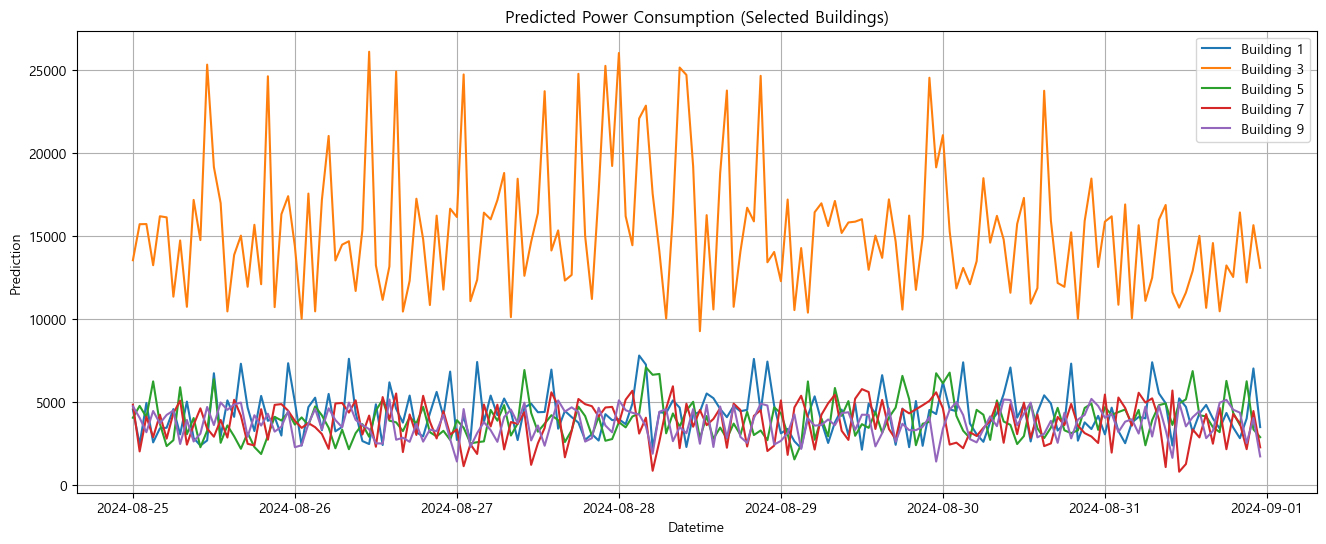

In [323]:
selected_buildings = [1, 3, 5, 7, 9]

plt.figure(figsize=(16, 6))

for b in selected_buildings:
    temp = df[df["building"] == b]
    plt.plot(temp["datetime"], temp["answer"], label=f"Building {b}")

plt.title("Predicted Power Consumption (Selected Buildings)")
plt.xlabel("Datetime")
plt.ylabel("Prediction")
plt.legend()
plt.grid(True)
plt.show()


In [324]:
submit.to_csv("sub_ML_out_ragroll.csv", index=False)

---

In [ ]:
train_dl.to_csv("train_dl.csv", index=False)
test_dl.to_csv("test_dl.csv", index = False)